# Student 2938740
## Part 2.1 Single Objective Optimisation

In [1]:
# Import libraries
import numpy as np
from random import randint
import csv

# Read file
# Columns for option[0], return[1], investment[2]
with open('Part2.csv', 'r', newline='') as f:
    reader = csv.reader(f, delimiter=',')
    data = [[int(row[0]), int(row[1]), int(row[2])] for row in reader if row]

# Create individual vectors
opportunities, returns, investments = [0]*100, [0]*100, [0]*100
for i in range(100):
    opportunities[i], returns[i], investments[i] = data[i][0], data[i][1], data[i][2]

# Delete data
del data

# Andrew way (with text file working)
# = open("Part2.txt", "r")     #Opens txt file
#items=f.readlines()            #Reads data from txt file
#alues = []                     #Opens an empty vector
#eights = []                    #Opens an empty vector
#or x in nitems:                #Extracts the data to create separate lists
#   numbers = x.split()         #Converts the string into a list
#   values.append(int(numbers[1]))   # Extracts data from middle column for values  
#   weights.append(int(numbers[2]))  # Extracts data from last column for values 


### Maximise return with hard limit of investment <= 50,000
Currently, the optimal solution is active on line 9, comment and use line 8 to run code

In [2]:
def knapsack_hc(limit, hc_type, steps=100):

    # initialise variables (inv = investment value, ret = return value), solution = empty vector length(opportunities)
    inv, ret, allowed, opps, solution = 0, 0, False, len(opportunities), [0]*len(opportunities)

    # Generate repeated random solutions and calculate investment cost until under limit
    while not allowed:
#        solution = [randint(0,1) for item in solution] 
        solution = [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
        inv = np.sum([investments[i] * solution[i] for i in range(opps)])
        allowed = (inv <= limit)

    # Calculate value of the allowed investments
    ret = np.sum([returns[i] * solution[i] for i in range(opps)])
    print(f"Initial solution - Investment: {inv}, Return: {ret}\n{'-'*51}")

    # Repeat hill climb, resetting allowed variable each time
    for step in range(steps):
        allowed = False

        # Adjust current solution until a new valid solution is found (step_ret = return for current step)
        while not allowed:
            step_inv, step_ret, step_sol = 0, 0, solution.copy()  # .copy() avoid updates to original list

            if hc_type == 1: # Randomly changes between included/excluded for one entry per step
                entry = randint(0, opps-1)
                step_sol[entry] = (1-step_sol[entry])

            elif hc_type == 2: # For each entry has 2/opps probability of being switched (on->off / off->on)
                for i in range(opps):
                    if random() < 2/opps:   
                        step_sol[i] = (1-step_sol[i]) 

            elif hc_type == 3: # Randomly swaps two entries (maybe same result or swap on/off and vice versa)
                entry1 = randint(0, opps-1)
                entry2 = randint(0, opps-1)
                step_sol[entry1], step_sol[entry2] = step_sol[entry2], step_sol[entry1]

            else:
                print("Ensure hc_type is 1, 2 or 3")
                break


            # Checks if the step solution under the limit
            step_inv = np.sum([investments[i] * step_sol[i] for i in range(opps)])
            allowed = (step_inv <= limit)

        # Calculate value of the allowed step solution
        step_ret = np.sum([returns[i] * step_sol[i] for i in range(opps)])
        #print(f"Step {step} - Inv: {step_inv}, Ret: {step_ret}, Improvement: {('No', 'Yes')[(step_ret > ret)]}")


        # If new step solution is better update solution vector
        solution, ret, inv = ([solution, ret, inv], [step_sol, step_ret, step_inv])[(step_ret > ret)]

    # Print results
    print(f"Optimal solution - Investment: {inv}, Return: {ret}\n{'-'*51}")
    final = [x for i,x in enumerate(opportunities) if solution[i]]
    print(f"Opportunities selected:\n{final}\n{'-'*51}")
    print(f"Solution vector:\n{solution}\n{'-'*51}")
    
    return

In [3]:
# Variables are limit, hc_type option, steps
knapsack_hc(50000, 3, 10000)

Initial solution - Investment: 50000, Return: 61400
---------------------------------------------------


<ipython-input-2-b2e44cdbcb28>:54: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  solution, ret, inv = ([solution, ret, inv], [step_sol, step_ret, step_inv])[(step_ret > ret)]


Optimal solution - Investment: 50000, Return: 61400
---------------------------------------------------
Opportunities selected:
[1, 3, 5, 7, 8, 9, 10, 13, 16, 17, 19, 20, 22, 23, 24, 25, 26, 30, 31, 32, 33, 38, 40, 42, 43, 44, 47, 49, 50, 51, 52, 55, 57, 61, 62, 63, 64, 65, 66, 67, 68, 71, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 86, 89, 90, 91, 93, 94, 96, 99, 100]
---------------------------------------------------
Solution vector:
[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
---------------------------------------------------


### Various Results Saved

In [ ]:
#### Initial solution - Investment: 41080, Return: 49080
---------------------------------------------------
#### Optimal solution - Investment: 49992, Return: 59692
---------------------------------------------------
Opportunities selected:
[1, 6, 7, 8, 10, 12, 14, 16, 17, 18, 20, 22, 24, 26, 28, 29, 30, 31, 35, 36, 38, 40, 42, 44, 45, 46, 47, 49, 50, 52, 54, 56, 57, 61, 62, 63, 64, 67, 71, 72, 73, 75, 76, 77, 79, 80, 84, 86, 87, 88, 89, 90, 91, 93, 99, 100]

&nbsp;

In [ ]:
#### Initial solution - Investment: 49997, Return: 61397
---------------------------------------------------
#### Opportunities selected:
[1, 3, 5, 7, 8, 9, 10, 13, 16, 17, 19, 20, 22, 23, 24, 25, 26, 30, 31, 32, 33, 38, 40, 42, 43, 44, 47, 49, 50, 51, 52, 55, 57, 61, 62, 63, 64, 65, 66, 67, 68, 71, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 86, 89, 90, 91, 93, 94, 96, 99, 100]
---------------------------------------------------
Solution vector:
[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
---------------------------------------------------

&nbsp;

In [ ]:
Initial solution - Investment: 49615, Return: 58915
---------------------------------------------------
Optimal solution - Investment: 50000, Return: 60300
---------------------------------------------------
Opportunities selected:
[1, 2, 3, 7, 8, 9, 15, 19, 22, 23, 24, 26, 32, 33, 34, 35, 37, 38, 40, 41, 42, 44, 47, 50, 52, 55, 56, 62, 63, 64, 65, 66, 67, 68, 70, 71, 76, 78, 79, 82, 83, 84, 86, 87, 88, 91, 93, 94, 96, 100]
---------------------------------------------------

&nbsp;

&nbsp;

## Part 2.2 Multi Objective Optimisation
The task is as follows:

1) Maximise the return
2) Minismise the total number of investments

Quick look at excel reveals:<br>
- Lowest cost investments: 70 items, cost 49050, return 59450, profit 10400<br>
- Highest return investments: 21 items, cost 49283, return 55983, profit 6700<br>
- Profit ratio: 61 items, cost 49496, return 60996, profit 11500<br>
- High profit: 32 items, cost 49791, return 59491, profit 9700<br>
<br>
This gives us some constraints:<br>
- Max number of items = 61<br>
- Min number of items = 32<br>

In [4]:
# Import libraries
import numpy as np
from random import randint
import csv
from matplotlib import pyplot as plt

In [5]:
# Read file
# Columns for option[0], return[1], investment[2]
with open('Part2.csv', 'r', newline='') as f:
    reader = csv.reader(f, delimiter=',')
    data = [[int(row[0]), int(row[1]), int(row[2])] for row in reader if row]

# Create individual vectors
opportunities, returns, investments = [0]*100, [0]*100, [0]*100
for i in range(100):
    opportunities[i], returns[i], investments[i] = data[i][0], data[i][1], data[i][2]

# Delete data
del data

In [10]:
# Set variables
limit = 50000
switcher = 3
steps = 1000

# initialise variables (inv = investment value, ret = return value), solution = empty vector length(opportunities)
inv, ret, prof, allowed, opps, solution = 0, 0, 0, False, len(opportunities), [0]*len(opportunities)

# Min solution: number of investments = 32
solution = [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0]
final = [solution]
inv = np.sum([investments[i] * solution[i] for i in range(opps)])
ret = np.sum([returns[i] * solution[i] for i in range(opps)])
prof = ret - inv
print(f"Initial solution - Investment: {inv}, Return: {ret}, Profit: {prof}\n{'-'*66}")

# Loop through number of investment from min to max (part 2.1 results)
for i in range(1,30):

    # Generate repeated random solutions and calculate investment cost until under limit
    allowed = False
    endless = 0
    while not allowed:
        
        # Initialise new variables
        new_inv, new_ret, new_prof, new_sol = 0, 0, 0, [0]*len(opportunities)
        
        # Create new solution as per original
        new_sol = solution.copy()
        
        # Drop random investment
        for j in range(1):
            r = [idx for idx, x in enumerate(new_sol) if x == True]
            idx = randint(0, len(r)-1)
            new_sol[r[idx]] = 0
        #print("length of new_sol after drop:", np.sum(new_sol))

        # Add (i+1) new investments to inrement number of investments
        for j in range(2):
            r = [idx for idx, x in enumerate(new_sol) if x == False]
            idx = randint(0, len(r)-1)
            new_sol[r[idx]] = 1
        #print("length of new_sol after add:", np.sum(new_sol))

        # Check new solution is valid
        new_inv = np.sum([investments[i] * new_sol[i] for i in range(opps)])
        if (new_inv <= limit):
            new_ret = np.sum([returns[i] * new_sol[i] for i in range(opps)])
            new_prof = new_ret - new_inv
            #print(f"New solution - Inv: {new_inv}, Ret: {new_ret}, Prof: {new_prof}, Improvement: {('No', 'Yes')[(new_prof > prof)]}")
            allowed = True
        else:
            endless += 1
        
        # Escape infinite loop if no new solution found in 10000 attempts
        if (endless==10000):
            break

    # Repeat hill climb, resetting allowed variable each time
    for step in range(steps):
        allowed = False
        endless = 0

        # Adjust current solution until a new valid solution is found (step_ret = return for current step)
        while not allowed:
            step_inv, step_ret, step_prof, step_sol = 0, 0, 0, new_sol.copy()  # .copy() avoid updates to original list

            if switcher == 1: # Randomly swaps two entries (maybe same result or swap on/off and vice versa)
                entry1a = randint(0, opps-1)
                entry1b = randint(0, opps-1)
                step_sol[entry1a], step_sol[entry1b] = step_sol[entry1b], step_sol[entry1a]
            elif switcher == 2: # Randomly swaps four entries
                entry1a = randint(0, opps-1)
                entry1b = randint(0, opps-1)
                entry2a = randint(0, opps-1)
                entry2b = randint(0, opps-1)
                step_sol[entry1a], step_sol[entry1b] = step_sol[entry1b], step_sol[entry1a]
                step_sol[entry2a], step_sol[entry2b] = step_sol[entry2b], step_sol[entry2a]
            elif switcher == 3: # Randomly swaps six entries
                entry1a = randint(0, opps-1)
                entry1b = randint(0, opps-1)
                entry2a = randint(0, opps-1)
                entry2b = randint(0, opps-1)
                entry3a = randint(0, opps-1)
                entry3b = randint(0, opps-1)
                step_sol[entry1a], step_sol[entry1b] = step_sol[entry1b], step_sol[entry1a]
                step_sol[entry2a], step_sol[entry2b] = step_sol[entry2b], step_sol[entry2a]
                step_sol[entry3a], step_sol[entry3b] = step_sol[entry3b], step_sol[entry3a]
            else:
                print("Ensure hc_type is 1, 2 or 3")
                allowed = True

            # Checks if the step solution under the limit
            step_inv = np.sum([investments[i] * step_sol[i] for i in range(opps)])
            if (step_inv <= limit):
                step_ret = np.sum([returns[i] * step_sol[i] for i in range(opps)])
                step_prof = step_ret - step_inv
                #print(f"Step {step} - Inv: {step_inv}, Ret: {step_ret}, Prof: {step_prof}, Improvement: {('No', 'Yes')[(step_prof > new_prof)]}")
                allowed = True
            else:
                endless += 1

            # Escape infinite loop if no new solution found in 10000 attempts
            if (endless == 10000):
                break  # Escape endless loop

        # If new step solution is better update solution vector
        solution, inv, ret, prof = ([new_sol, new_inv, new_ret, new_prof], [step_sol, step_inv, step_ret, step_prof])[(step_prof >= new_prof)]
        
            
    print(f"Best solution for {np.sum(solution)} investments - Inv: {inv}, Ret: {ret}, Prof: {prof}")
    final.append(solution)

print("end")

Initial solution - Investment: 49791, Return: 59491, Profit: 9700
------------------------------------------------------------------


<ipython-input-10-8addf5c5ce00>:108: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  solution, inv, ret, prof = ([new_sol, new_inv, new_ret, new_prof], [step_sol, step_inv, step_ret, step_prof])[(step_prof >= new_prof)]


Best solution for 33 investments - Inv: 49495, Ret: 59095, Prof: 9600
Best solution for 34 investments - Inv: 46955, Ret: 56355, Prof: 9400
Best solution for 35 investments - Inv: 47158, Ret: 56658, Prof: 9500
Best solution for 36 investments - Inv: 48730, Ret: 58430, Prof: 9700
Best solution for 37 investments - Inv: 47921, Ret: 57521, Prof: 9600
Best solution for 38 investments - Inv: 48310, Ret: 57910, Prof: 9600
Best solution for 39 investments - Inv: 49213, Ret: 58913, Prof: 9700
Best solution for 40 investments - Inv: 49284, Ret: 58884, Prof: 9600
Best solution for 41 investments - Inv: 49373, Ret: 59073, Prof: 9700
Best solution for 42 investments - Inv: 48538, Ret: 58238, Prof: 9700
Best solution for 43 investments - Inv: 49479, Ret: 59279, Prof: 9800
Best solution for 44 investments - Inv: 49785, Ret: 59385, Prof: 9600
Best solution for 45 investments - Inv: 49899, Ret: 59499, Prof: 9600
Best solution for 46 investments - Inv: 49534, Ret: 59034, Prof: 9500
Best solution for 47

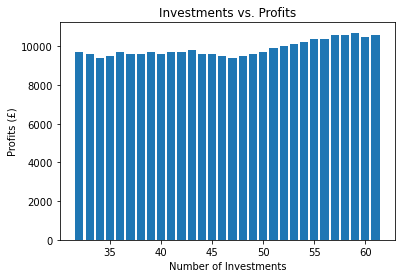

In [11]:
# Prepare data for plotting
numInv = [x for x in range(32, 62)]
finCost, finRet, finProfit = [0]*30, [0]*30, [0]*30
for x in range(30):
    finCost[x] = np.sum([final[x][i] * investments[i] for i in range(opps)])
    finRet[x] = np.sum([final[x][i] * returns[i] for i in range(opps)])
    finProfit[x] = finRet[x] - finCost[x]

plt.bar(numInv, finProfit)
plt.title('Investments vs. Profits')
plt.xlabel('Number of Investments')
plt.ylabel('Profits (£)')
plt.show()

In [12]:
# Display output for final row in results vector (30 rows from 32 items to 61 items)
print([x for i,x in enumerate(opportunities) if final[29][i]])

[1, 3, 4, 5, 6, 8, 9, 13, 15, 19, 20, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 36, 38, 39, 40, 42, 44, 45, 46, 47, 50, 51, 52, 53, 55, 56, 57, 59, 61, 63, 64, 66, 67, 68, 69, 71, 74, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87, 89, 90, 93, 100]
